In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/economic_index (1).csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#drop unnnecessary column
df.drop(columns = ["Unnamed: 0","year","month"],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
## Check null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


In [9]:
import seaborn as sns

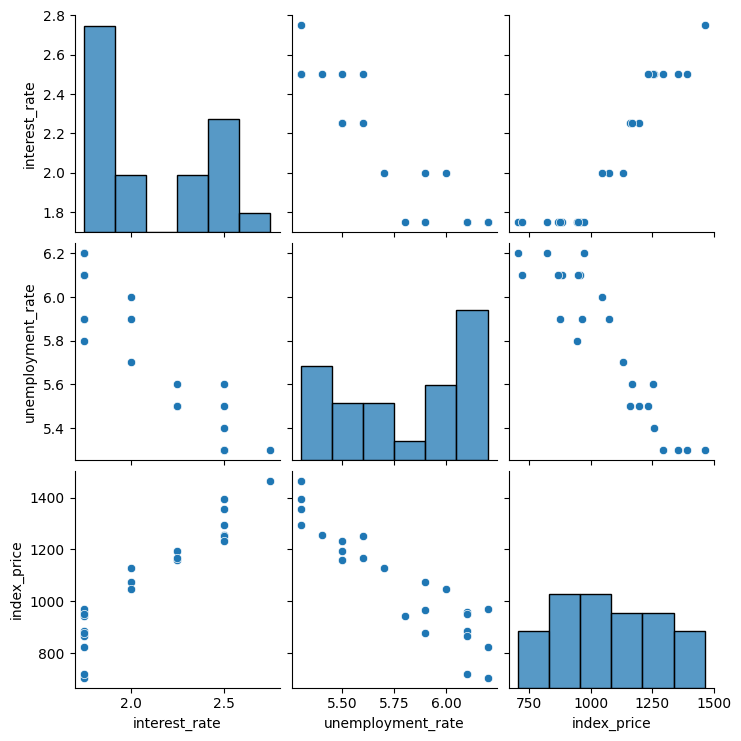

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemplyable rate')

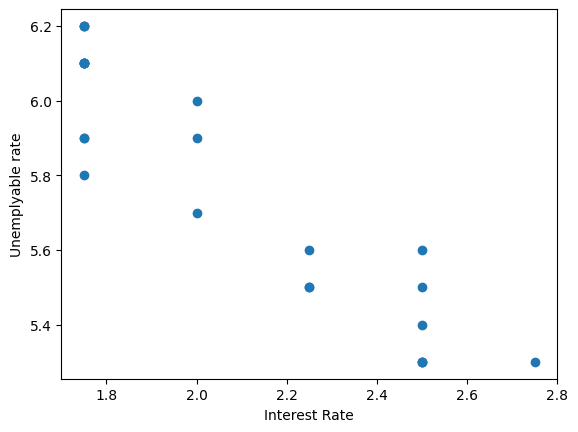

In [13]:
#Visualize the datapoints
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Unemplyable rate")

In [15]:
X = df[['interest_rate','unemployment_rate']]
y = df[['index_price']]

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
#Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

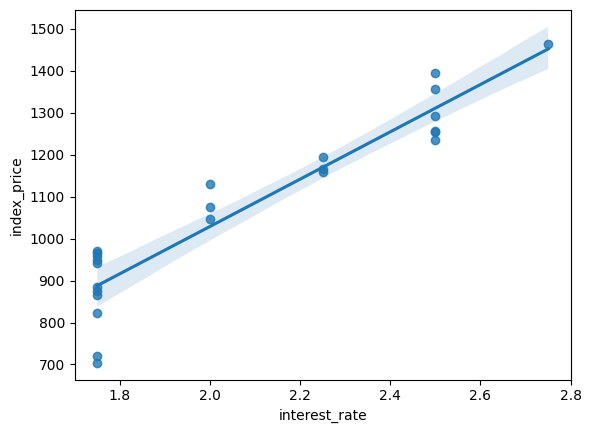

In [21]:
sns.regplot(x='interest_rate',y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

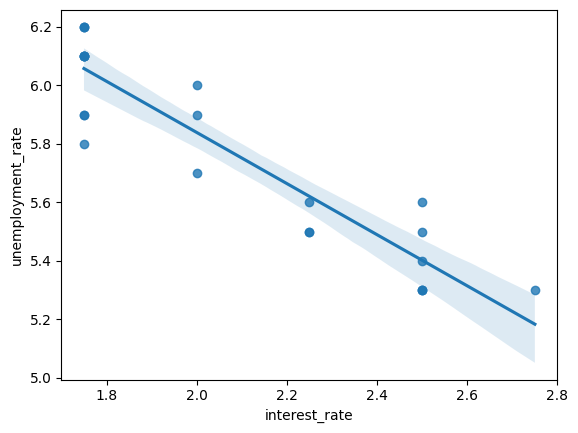

In [23]:
sns.regplot(x='interest_rate',y='unemployment_rate', data=df)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [28]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [35]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [36]:
#Prediction
y_pred  = regression.predict(X_test)

In [37]:
y_pred

array([[1180.7466813 ],
       [ 802.74279699],
       [1379.83457045],
       [ 838.52599602],
       [ 973.85313963],
       [1144.96348227]])

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


8108.567426306604
73.80444932337097
90.04758423359621


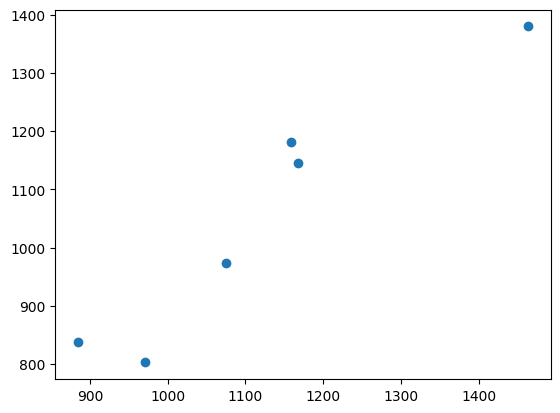

In [44]:
plt.scatter(y_test,y_pred)

In [45]:
residuals= y_test-y_pred
print(residuals)

    index_price
8    -21.746681
16   168.257203
0     84.165430
18    45.474004
11   101.146860
9     22.036518


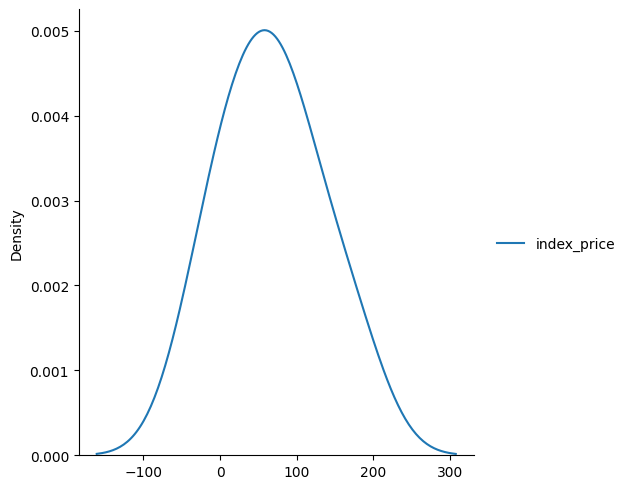

In [46]:
sns.displot(residuals,kind='kde')

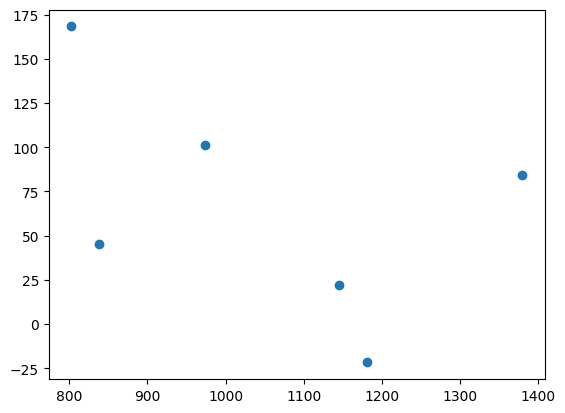

In [48]:
plt.scatter(y_pred,residuals)

Copy the OLS model from linear regression.ipynb
